In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

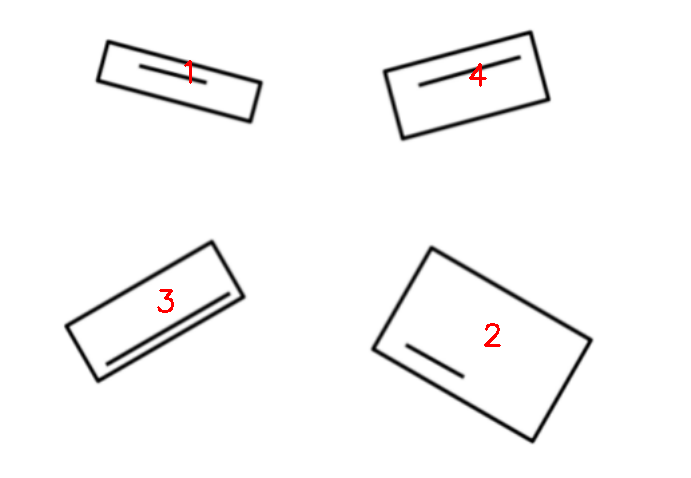

In [7]:
# Loading the image
img = cv2.imread('/content/rectangle.png', 1)

# Converting the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# detect the edge
edges = cv2.Canny(gray, threshold1=50, threshold2=150)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate lengths of lines in each contour
lengths = [cv2.arcLength(contour, True) for contour in contours]

# dictionary to map contour index to length
length_dict = {i: length for i, length in enumerate(lengths)}

# Assign numbers based on the length
assigned_numbers = {}
for i in range(2, 5):
    max_length_index = max(length_dict, key=length_dict.get)
    assigned_numbers[max_length_index] = i
    del length_dict[max_length_index]
remaining_contour = next(iter(length_dict))
assigned_numbers[remaining_contour] = 1

# assign numbers on rectangles based on assigned numbers
for contour_index, assigned_number in assigned_numbers.items():
    x, y, w, h = cv2.boundingRect(contours[contour_index])
    cv2.putText(img, str(assigned_number), (x + w // 2, y + h // 2), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Display the image
cv2_imshow(img)

cv2.waitKey(0)
cv2.destroyAllWindows()
